## Jonesh Shrestha (2222011)
## CSC 580 AI II (Winter 2026)
## **Homework\#1-2**: K-armed Bandit
### This code implements the example on Slide 16 in lecture note (\#1 MDP)

### (1) Definition of the four bandits (Action1-4), implemented as a function -- Completely filled

In [1]:
import random

def Action1():
    return 8

def Action2():
    num = random.random()
    if num < 0.88:
        return 0
    else:
        return 100

def Action3():
    return random.uniform(-10, 35)

def Action4():
    num = random.random()
    ret = 0.0
    if num < 0.3333:
        ret = 20
    elif num < 0.6667:
        ret = random.choice([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
    return ret

### (2) Code for the simulation of Exploration vs. Exploitation

In [2]:
import numpy as np

def run_epsilon_greedy(actions, epsilon, timesteps, runs, initial_Q=False, init_Qlist=None):
    """
    This function essentially implements the 'Simple bandit algorithm' shown in
    Sutton's book, p. 32.  For EVERY timestep, the _greedy_ action is determined
    by looking up the Q values (of the actions) or chosen randomly depending
    on the epsilon value.  Repeat the experiment 'runs' number of times.
    """
    n = len(actions)

    # accumulator for all runs
    Q_sum = np.zeros(n)
    N_sum = np.zeros(n)
    Reward_sum = np.zeros(timesteps)
    optimal_count = np.zeros(timesteps)
    
    for run in range(runs):    
        # Initialize Q and N for this run
        if initial_Q:
            Q = np.array(init_Qlist.copy())
        else:
            Q = np.zeros(n)
        N = np.zeros(n)
        
        for timestep in range(timesteps):
            # Generate a random number to compare with ε
            random_num = np.random.rand()
            # Choose action: Probability ε (exploration), Probability 1 - ε (exploitation)
            if random_num > epsilon:
                # A = np.argmax(Q)
                max_val = np.max(Q)
                # gets the indices with maximum reward and choose one randomly to avoid ties
                A = np.random.choice(np.where(Q == max_val)[0])
            else:
                A = np.random.randint(n)

            Reward = actions[A]()
            # Optimal Action 3
            if A == 2:
                optimal_count[timestep] += 1
            Reward_sum[timestep] += Reward
            N[A] = N[A] + 1
            Q[A] = Q[A] + ((Reward - Q[A]) / N[A])
        
        Q_sum += Q
        N_sum += N
        
    return Q_sum/runs, N_sum/runs, Reward_sum/runs, optimal_count/runs

### (3) Run the algorithm with various epsilons

We can observe the Q values and the number of times each action was called (over 2000 runs) for various epsilon values.  Note the _optimal_ action (as the ground truth) is Action3.

In [3]:
Actions = [Action1, Action2, Action3, Action4]  # 4 bandits/actions (defined in the first cell)
timesteps = 1000  # number of timesteps per run
runs = 2000       # number of runs

epsilons = [0.0, 0.01, 0.1]

for epsilon in epsilons:
    Q, N, _, _ = run_epsilon_greedy(Actions, epsilon, timesteps, runs)
    print(f'Epsilon {epsilon}: Q={Q}, N{N}')

# """
# Epsilon 0.0: Q=[3.132      0.58770395 3.00575328 3.17310317], N=[391.2715  48.318  272.477  287.9335]
# Epsilon 0.01: Q=[7.652      3.18306223 8.52051535 8.50894474], N=[199.983   76.321  389.5555 334.1405]
# Epsilon 0.1: Q=[ 8.          9.13217714 11.77415826 10.59225877], N=[ 55.296  169.37   530.2625 245.0715]
# """

Epsilon 0.0: Q=[3.356      0.63211593 2.68958047 3.072785  ], N[419.235  52.327 248.995 279.443]
Epsilon 0.01: Q=[7.636      3.16572269 8.65564236 8.4707068 ], N[201.471   78.2665 400.535  319.7275]
Epsilon 0.1: Q=[ 8.          9.23841972 11.77762413 10.59323158], N[ 53.218  176.6455 524.9245 245.212 ]


### (4) Plot the performance of the three epsilons.  Your plot should look like this:
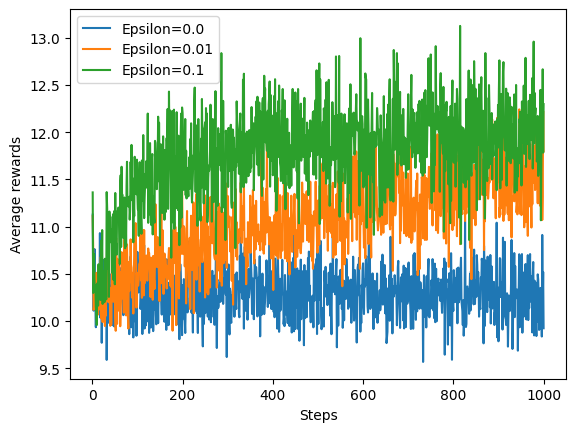

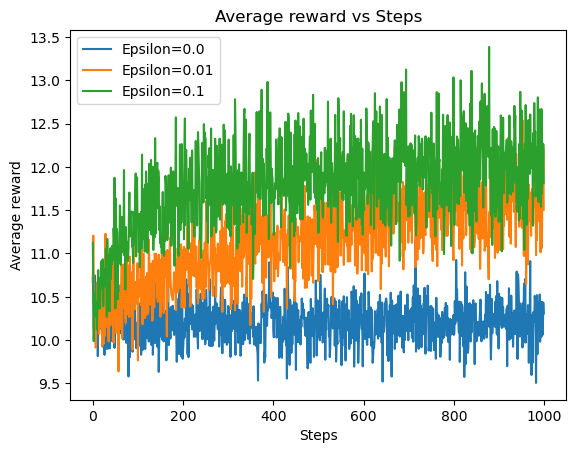

In [4]:
import matplotlib.pyplot as plt

plt.figure()
for epsilon in epsilons:
    _, _, average_rewards, _ = run_epsilon_greedy(Actions, epsilon, timesteps, runs)
    plt.plot(average_rewards, label=f'Epsilon={epsilon}')

plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title("Average reward vs Steps")
plt.legend()
plt.show()

### (5) Plot the percentage of the time the Optimal Action (Action 3) was called.  Your plot should look like this:
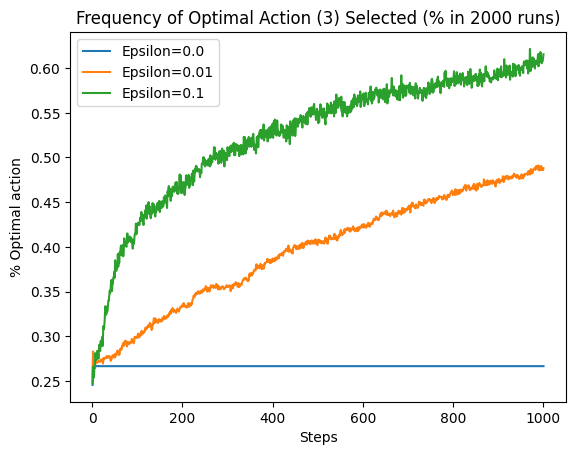

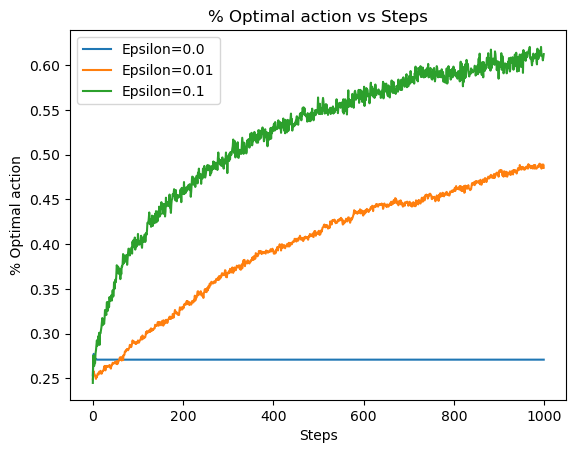

In [5]:
plt.figure()
for epsilon in epsilons:
    _, _, _, optimal_pct = run_epsilon_greedy(Actions, epsilon, timesteps, runs)
    plt.plot(optimal_pct, label=f'Epsilon={epsilon}')

plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.title("% Optimal action vs Steps")
plt.legend()
plt.show()

### (6) Experiment with Initial Q values.
**Make Action1 the best initially (by setting its Q value the highest)**.  Then run the same experiment and show the average rewards.

Show the output.  It should look similar to this:

```
Epsilon 0.0: Q=[8. 0. 0. 0.], N=[1000.    0.    0.    0.]
Epsilon 0.01: Q=[8.     1.6905 4.5245 5.0895], N=[966.3555   8.2365  13.403   12.005 ]
Epsilon 0.1: Q=[8.     1.051  1.906  1.1695], N=[882.19    40.284   40.3105  37.2155]
```



In [6]:
for epsilon in epsilons:
    Q, N, _, _ = run_epsilon_greedy(Actions, epsilon, timesteps, runs, initial_Q=True, init_Qlist=[8, 0, 0, 0])
    print(f'Epsilon {epsilon}: Q={Q}, N{N}')

Epsilon 0.0: Q=[8. 0. 0. 0.], N[1000.    0.    0.    0.]
Epsilon 0.01: Q=[8.     1.6095 4.356  5.021 ], N[966.962    8.2585  13.0185  11.761 ]
Epsilon 0.1: Q=[8.     1.0005 1.922  1.177 ], N[881.6755  40.5705  40.596   37.158 ]


### (7) Plot the performance of the three epsilons.  Your plot should look like this:
![hw1-1-3.png](hw1-1-3.png)

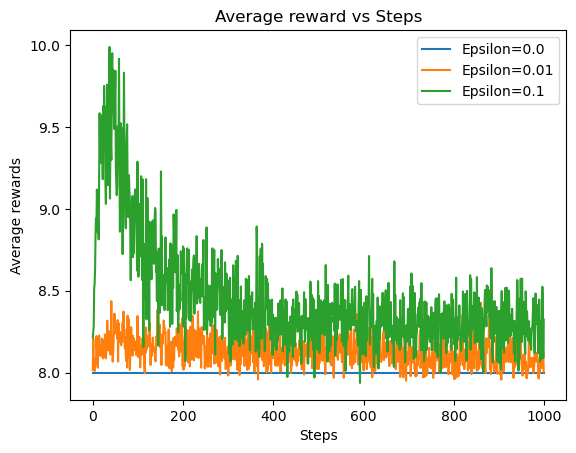

In [7]:
plt.figure()
for epsilon in epsilons:
    _, _, average_rewards, _ = run_epsilon_greedy(Actions, epsilon, timesteps, runs, initial_Q=True, init_Qlist=[8, 0, 0, 0])
    plt.plot(average_rewards, label=f'Epsilon={epsilon}')

plt.xlabel('Steps')
plt.ylabel('Average rewards')
plt.title("Average reward vs Steps")
plt.legend()
plt.show()